## Pratice Portfolio Recommender System using [Udemy Course](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)

#### Part 1  - `Visualizing data`
[dataset used link](http://grouplens.org/datasets/movielens/)

In [2]:
import numpy as np
import pandas as pd

In [6]:
columns_names = ['user_id','item_id','rating','timestamp']

In [7]:
df = pd.read_csv('u.data',sep='\t',names=columns_names)

In [8]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [9]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [10]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df = pd.merge(df,movie_titles,on='item_id')

In [12]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [14]:
import matplotlib as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [16]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [18]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [19]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
ratings['num of rating'] = df.groupby('title')['rating'].count()

In [22]:
ratings.head()

,rating,num of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: xlabel='num of rating', ylabel='Count'>

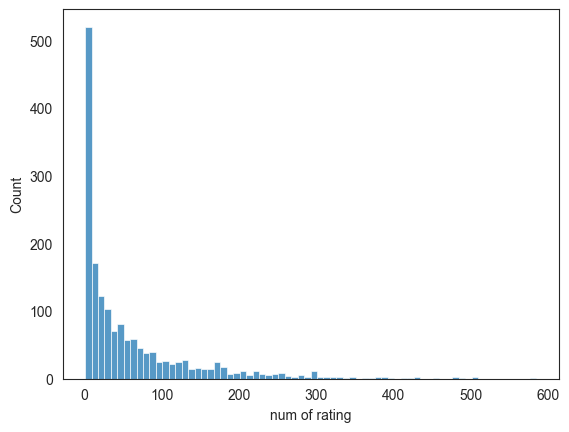

In [23]:
sns.histplot(ratings,x='num of rating',bins=70)

<Axes: xlabel='rating', ylabel='Count'>

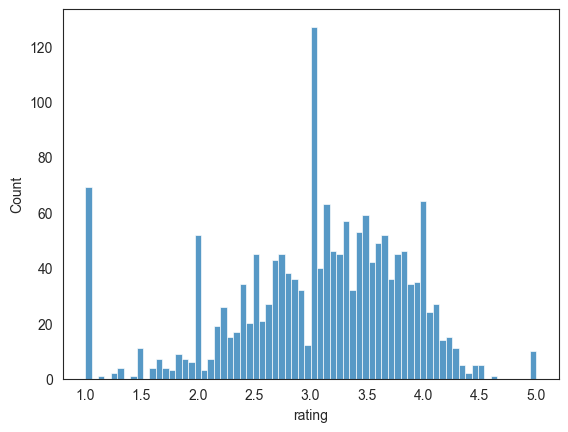

In [24]:
sns.histplot(ratings,x='rating',bins=70)

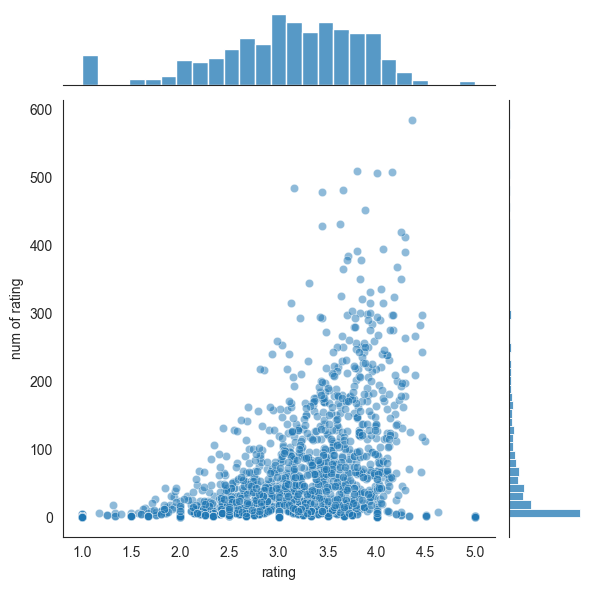

In [25]:
sns.jointplot(data=ratings,x='rating',y='num of rating',alpha=0.5)

#### Part2 - `Developing the recommender system`

In [27]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [28]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ratings.sort_values('num of rating',ascending=False).head(10)

,rating,num of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [30]:
starwars_user_ratings = moviemat['Star Wars (1977)']
toy_story_user_ratings = moviemat['Toy Story (1995)']

In [35]:
similar_to_star_wars=moviemat.corrwith(starwars_user_ratings)
similar_to_toy_story = moviemat.corrwith(toy_story_user_ratings)

c:\Users\AB\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\AB\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [42]:
corr_starwars = pd.DataFrame(similar_to_star_wars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


issue certain title have perfect correlation with the movie star wars which is not ideal. Example Hollow Reed has perfect correlation with is not true.Solution is movies having more number of ratings in this case we use movies having 100+ ratings

In [43]:
corr_starwars.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [44]:
corr_starwars = corr_starwars.join(ratings['num of rating'])
corr_starwars.head()

,Correlation,num of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [46]:
# now are correlation makes sense
corr_starwars[corr_starwars['num of rating']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [48]:
# now for toy story
corr_toy_story = pd.DataFrame(similar_to_toy_story,columns=['Correlation'])
corr_toy_story.dropna(inplace=True)

In [49]:
corr_toy_story = corr_toy_story.join(ratings['num of rating'])
corr_toy_story.head()

,Correlation,num of rating
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [50]:
corr_toy_story[corr_toy_story['num of rating']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of rating
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129
